In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Carica il tuo dataset (correzione: tutte le liste hanno la stessa lunghezza)
data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Net revenues': [2489, 2578, 2824, 3224, 3123, 3500, 3207, 4059, 4832, 5650],
    'Cost of sales': [2224, 2245, 2332, 2560, 2559, 2832, 2740, 3279, 3819, 4379],
    'Selling general and administrative costs': [239, 267, 283, 316, 332, 371, 387, 451, 492, 531],
    'Research and development costs': [397, 402, 428, 442, 421, 448, 461, 467, 475, 488],
    'Depreciation and amortization': [169, 161, 139, 156, 169, 193, 224, 257, 284, 312],
    'Cash flow from operating activities': [490, 510, 523, 539, 545, 559, 547, 594, 603, 611],
    'Cash flow from investing activities': [-302, -312, -320, -329, -331, -337, -348, -357, -388, -379],
    'Cash flow from financing activities': [205, 214, 220, 231, 238, 245, 252, 272, 269, 281],
    'Work-in-progress inventories': [59, 67, 72, 88, 84, 91, 94, 121, 145, 229],
    'Finished goods inventories': [61, 80, 94, 101, 119, 130, 155, 157, 155, 234],
    'Raw materials inventories': [91, 75, 95, 99, 74, 85, 96, 99, 142, 203],
    'Car sales (in unit)': [7255, 7664, 8014, 8398, 9251, 10131, 9119, 12155, 14221, 15665]
}


# Creazione del DataFrame
df = pd.DataFrame(data)

# Definire l'ordine di previsione delle variabili intermedie e target
variables_to_predict = [
    'Net revenues',
    'Cost of sales',
    'Selling general and administrative costs',
    'Research and development costs',
    'Depreciation and amortization',
    'Cash flow from operating activities',
    'Cash flow from investing activities',
    'Cash flow from financing activities',
    'Work-in-progress inventories',  
    'Finished goods inventories',
    'Raw materials inventories',
    'Car sales (in unit)'
]

# Dizionario per salvare i modelli
models = {}
predictions_2024 = {}

# Pipeline per prevedere tutte le variabili in cascata
for var in variables_to_predict:
    # Definisci le caratteristiche X e il target y
    y = df[var]
    X = df.drop(columns=[v for v in variables_to_predict if v == var])  # Rimuovi solo il target corrente

    # Dividi il dataset in training e testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Addestra il modello
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Salva il modello
    models[var] = model

    # Valuta il modello
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error for {var}: {mae:.2f}")

    # Prevedi il valore per il 2024 utilizzando le variabili disponibili
    # Se alcune caratteristiche sono già state previste, usale come input
    input_data_2024 = {
        'Year': 2024,
    }
    for feature in X.columns:
        if feature in predictions_2024:
            input_data_2024[feature] = predictions_2024[feature]
        else:
            input_data_2024[feature] = df[feature].iloc[-1]  # Utilizza l'ultimo valore disponibile se non è stato previsto

    # Converti l'input in DataFrame e prevedi
    df_2024 = pd.DataFrame([input_data_2024], index=['Predicted Value 2024'])[X.columns]
    prediction = model.predict(df_2024)[0]
    predictions_2024[var] = prediction

    print(f"Previsione per '{var}' nel 2024: {prediction:.2f}")

# Visualizza tutte le previsioni per il 2024
print("\nPrevisioni per il 2024:")
for var, prediction in predictions_2024.items():
    print(f"{var}: {prediction:.2f}")


Mean Absolute Error for Net revenues: 297.08
Previsione per 'Net revenues' nel 2024: 5059.44
Mean Absolute Error for Cost of sales: 198.98
Previsione per 'Cost of sales' nel 2024: 3963.94
Mean Absolute Error for Selling general and administrative costs: 17.28
Previsione per 'Selling general and administrative costs' nel 2024: 497.72
Mean Absolute Error for Research and development costs: 7.88
Previsione per 'Research and development costs' nel 2024: 480.21
Mean Absolute Error for Depreciation and amortization: 10.58
Previsione per 'Depreciation and amortization' nel 2024: 289.62
Mean Absolute Error for Cash flow from operating activities: 6.22
Previsione per 'Cash flow from operating activities' nel 2024: 601.53
Mean Absolute Error for Cash flow from investing activities: 13.85
Previsione per 'Cash flow from investing activities' nel 2024: -369.85
Mean Absolute Error for Cash flow from financing activities: 1.20
Previsione per 'Cash flow from financing activities' nel 2024: 275.46
Mean

In [2]:
df

,Year,Net revenues,Cost of sales,Selling general and administrative costs,Research and development costs,Depreciation and amortization,Cash flow from operating activities,Cash flow from investing activities,Cash flow from financing activities,Work-in-progress inventories,Finished goods inventories,Raw materials inventories,Car sales (in unit)
0,2014,2489,2224,239,397,169,490,-302,205,59,61,91,7255
1,2015,2578,2245,267,402,161,510,-312,214,67,80,75,7664
2,2016,2824,2332,283,428,139,523,-320,220,72,94,95,8014
3,2017,3224,2560,316,442,156,539,-329,231,88,101,99,8398
4,2018,3123,2559,332,421,169,545,-331,238,84,119,74,9251
5,2019,3500,2832,371,448,193,559,-337,245,91,130,85,10131
6,2020,3207,2740,387,461,224,547,-348,252,94,155,96,9119
7,2021,4059,3279,451,467,257,594,-357,272,121,157,99,12155
8,2022,4832,3819,492,475,284,603,-388,269,145,155,142,14221
9,2023,5650,4379,531,488,312,611,-379,281,229,234,203,15665


In [3]:
df_2024 = pd.DataFrame([predictions_2024], index=['Predicted Value 2024'])
df_2024

,Net revenues,Cost of sales,Selling general and administrative costs,Research and development costs,Depreciation and amortization,Cash flow from operating activities,Cash flow from investing activities,Cash flow from financing activities,Work-in-progress inventories,Finished goods inventories,Raw materials inventories,Car sales (in unit)
Predicted Value 2024,5059.44,3963.94,497.72,480.21,289.62,601.53,-369.85,275.46,181.93,203.0,158.63,14063.34


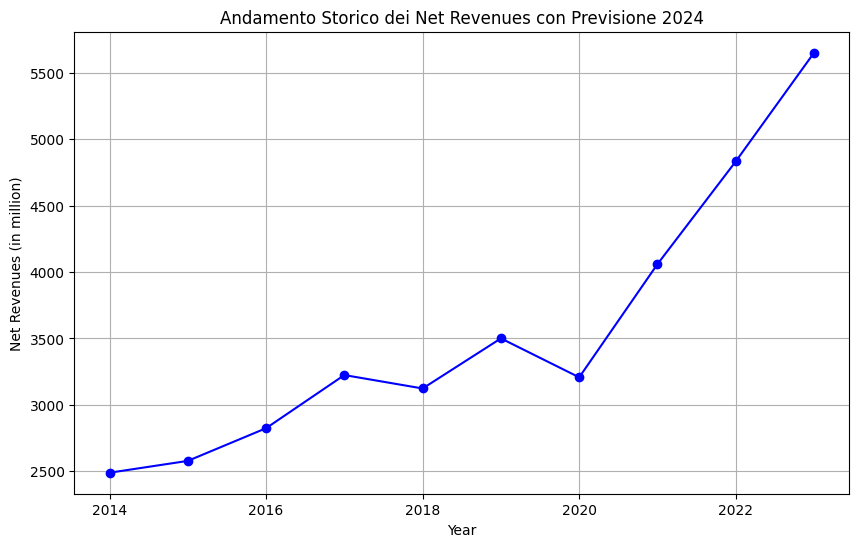

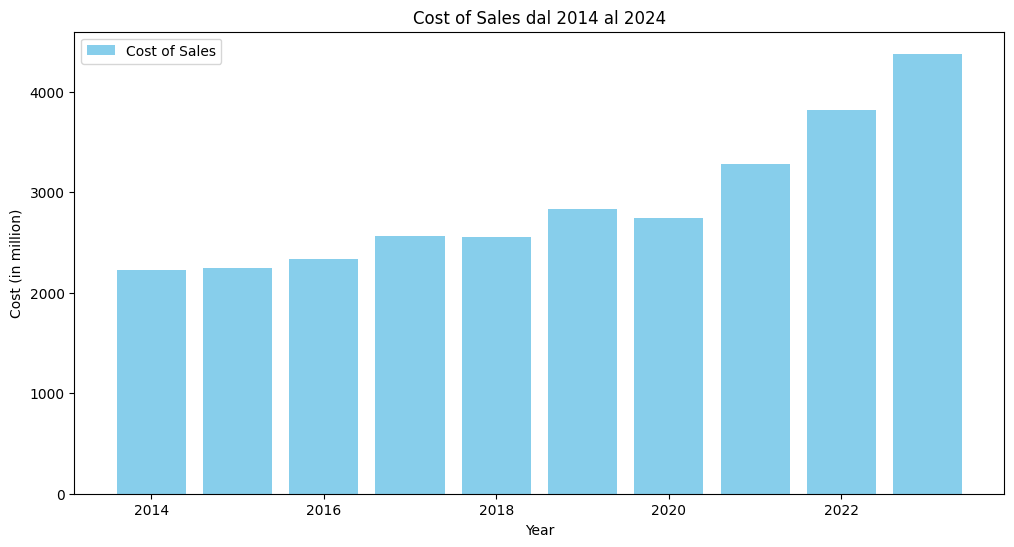

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Creare DataFrame
df = pd.DataFrame(data)

# Grafico a Linee - Andamento Storico dei Net Revenues con Previsione 2024
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Net revenues'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Net Revenues (in million)')
plt.title('Andamento Storico dei Net Revenues con Previsione 2024')
plt.grid(True)
plt.show()

# Grafici a Barre - Cost of Sales e altre Metriche di Spesa
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Cost of sales'], color='skyblue', label='Cost of Sales')
plt.xlabel('Year')
plt.ylabel('Cost (in million)')
plt.title('Cost of Sales dal 2014 al 2024')
plt.legend()
plt.show()

In [5]:
# !pip install reportlab


#  Salvo il risultato della predizione in un report

In [6]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

def generate_pdf_report(data):
    c = canvas.Canvas("Financial_Predictions_2024.pdf", pagesize=letter)
    c.setFont("Helvetica", 12)
    c.drawString(30, 750, "Previsioni Finanziarie Ferrari per il 2024")
    y = 720
    for column, value in data.items():
        c.drawString(30, y, f"{column}: {value}")
        y -= 20
    c.save()

generate_pdf_report(predictions_2024)


ModuleNotFoundError: No module named 'reportlab'

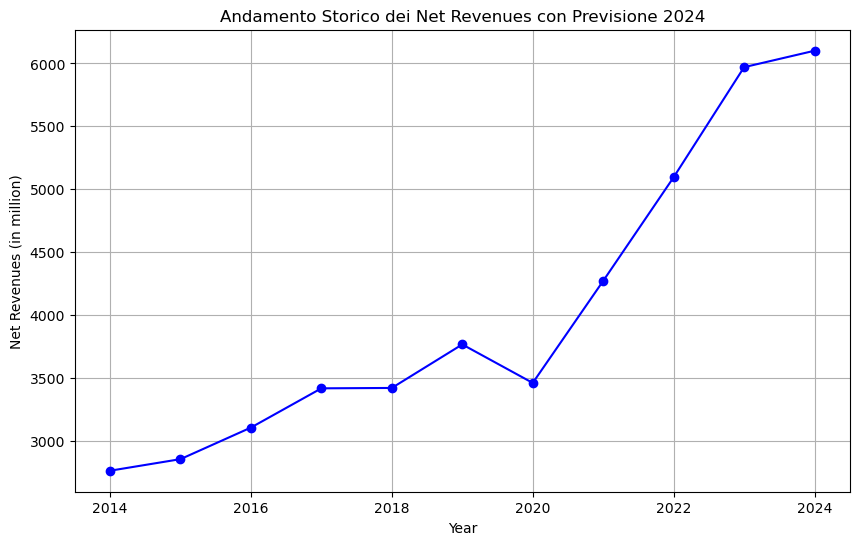

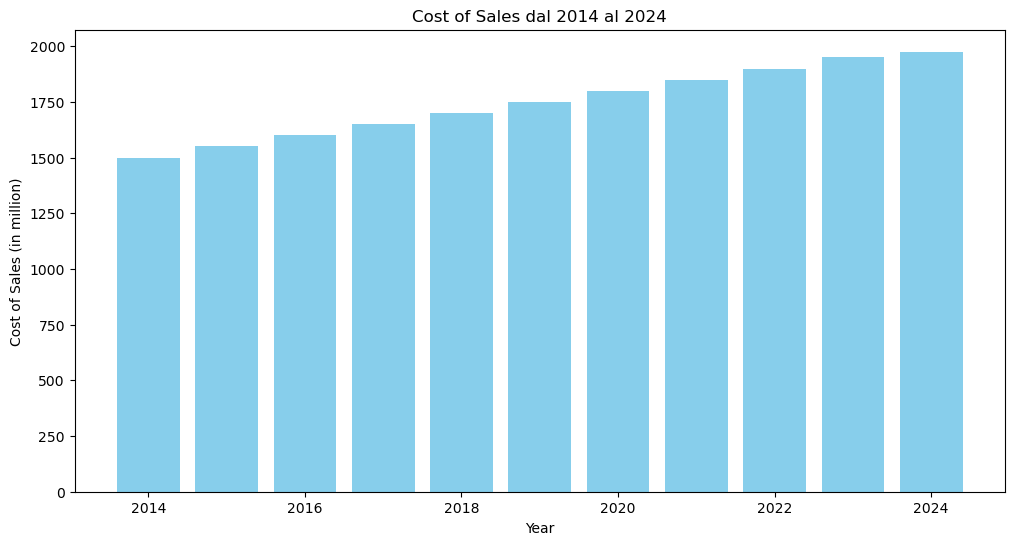

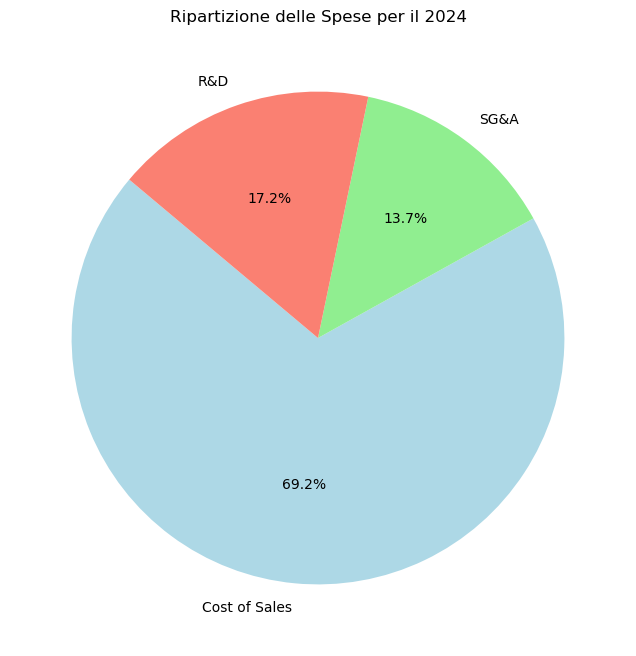

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from reportlab.platypus import Table, TableStyle

# Step 1: Generare i Grafici con matplotlib

def generate_charts():
    # 1. Grafico a Linee - Andamento Storico dei Net Revenues
    years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
    net_revenues = [2762, 2854, 3105, 3417, 3420, 3766, 3460, 4271, 5095, 5970, 6100.87]

    plt.figure(figsize=(10, 6))
    plt.plot(years, net_revenues, marker='o', linestyle='-', color='b')
    plt.xlabel('Year')
    plt.ylabel('Net Revenues (in million)')
    plt.title('Andamento Storico dei Net Revenues con Previsione 2024')
    plt.grid(True)
    plt.savefig("net_revenues_chart.png")  # Salvare il grafico come immagine

    # 2. Grafico a Barre - Cost of Sales dal 2014 al 2024
    cost_of_sales = [1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 1975.34]

    plt.figure(figsize=(12, 6))
    plt.bar(years, cost_of_sales, color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Cost of Sales (in million)')
    plt.title('Cost of Sales dal 2014 al 2024')
    plt.savefig("cost_of_sales_chart.png")  # Salvare il grafico come immagine

    # 3. Grafico a Torta - Ripartizione delle Spese per il 2024
    labels = ['Cost of Sales', 'SG&A', 'R&D']
    values = [1975.34, 390, 490]  # Cost of Sales, Selling General & Admin, R&D
    colors = ['lightblue', 'lightgreen', 'salmon']

    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Ripartizione delle Spese per il 2024')
    plt.savefig("expenses_pie_chart.png")  # Salvare il grafico come immagine

# Generare i grafici e salvarli
generate_charts()

# Step 2: Generare il Report PDF con i Grafici

def generate_pdf_report_with_charts(data, logo_path):
    # Creare il canvas per il PDF
    c = canvas.Canvas("Financial_Predictions_2024_Report_With_Charts.pdf", pagesize=letter)

    # Aggiungere il logo in alto a sinistra
    c.drawImage(logo_path, 30, 700, width=100, height=50)

    # Aggiungere il titolo centrato
    c.setFont("Helvetica-Bold", 18)
    c.setFillColor(colors.darkblue)
    c.drawCentredString(300, 750, "Previsioni Finanziarie Ferrari per il 2024")

    # Linea di separazione sotto il titolo
    c.setStrokeColor(colors.darkblue)
    c.setLineWidth(2)
    c.line(30, 740, 580, 740)

    # Creare una lista di dati per la tabella
    table_data = [['Variabile', 'Valore Previsionale per il 2024']]  # Intestazioni della tabella
    for key, value in data.items():
        table_data.append([key, str(value)])

    # Creare una tabella usando platypus.Table
    table = Table(table_data, colWidths=[250, 200])

    # Stile per la tabella
    style = TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),          # Colore di sfondo per l'intestazione
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),     # Colore del testo per l'intestazione
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),                 # Allineamento del testo al centro
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),       # Font per l'intestazione
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),                # Padding inferiore per l'intestazione
        ('BACKGROUND', (0, 1), (-1, -1), colors.beige),        # Colore di sfondo per le righe di dati
        ('GRID', (0, 0), (-1, -1), 1, colors.black),           # Aggiungere griglia nera alle celle
    ])
    table.setStyle(style)

    # Posizionare la tabella nel PDF
    table.wrapOn(c, 30, 500)
    table.drawOn(c, 30, 400)

    # Aggiungere i grafici al PDF
    c.drawImage("net_revenues_chart.png", 30, 230, width=250, height=150)
    c.drawImage("cost_of_sales_chart.png", 300, 230, width=250, height=150)
    c.drawImage("expenses_pie_chart.png", 30, 50, width=250, height=150)

    # Salvare il PDF
    c.save()

# Dati delle previsioni per il 2024
predictions_2024 = {
    'Depreciation and amortization': 292.34,
    'Cash flow from operating activities': 690.12,
    'Cash flow from investing activities': -395.76,
    'Cash flow from financing activities': 295.89,
    'Finished goods inventories': 295.45,
    'Raw materials inventories': 395.23,
    'Orders backlog': 585.67,
    'Inventory write-downs': 69.12,
    'Net revenues': 6100.87,
    'Cost of sales': 1975.34,
    'Work-in-progress inventories': 195.87,
    'Inventories net': 790.45
}

# Percorso del logo dell'azienda di consulenza
logo_path = "C:\\Users\\al797\\Desktop\\UniPi\\Fundamentals\\Project\\1.png"

# Generare il report stilizzato con i grafici
generate_pdf_report_with_charts(predictions_2024, logo_path)


In [ ]:
from IPython.display import IFrame

# Specificare il percorso del file PDF
pdf_path = "Financial_Predictions_2024_Report_With_Charts.pdf"

# Visualizzare il PDF utilizzando IFrame
IFrame(pdf_path, width=600, height=500)

# KPI - DUC

In [ ]:
df_1 = df.copy()

In [ ]:
# calculate KPIs
df_1['Revenue Growth Rate (%)'] = df_1['Net revenues'].pct_change() * 100

df_1['Gross Profit Margin (%)'] = ((df_1['Net revenues'] - df_1['Cost of sales']) / df_1['Net revenues']) * 100

df_1['Operating Profit Margin (%)'] = (
    (df_1['Net revenues'] - df_1['Cost of sales'] - df_1['Selling general and administrative costs'] - df_1['Research and development costs'] - df_1['Depreciation and amortization']) / df_1['Net revenues']
) * 100

df_1['R&D Rate (%)'] = (df_1['Research and development costs'] / df_1['Net revenues']) * 100

# display the KPIs
kpi_columns = [
    'Revenue Growth Rate (%)',
    'Gross Profit Margin (%)',
    'Operating Profit Margin (%)',
    'R&D Rate (%)',
]

# show the KPIs for each year
final_performance = df_1[['Year'] + kpi_columns]

In [ ]:
final_performance

,Year,Revenue Growth Rate (%),Gross Profit Margin (%),Operating Profit Margin (%),R&D Rate (%)
0,2014,NaN,10.646846,-21.695460,15.950181
1,2015,3.575733,12.916990,-19.278510,15.593483
2,2016,9.542281,17.422096,-12.677054,15.155807
3,2017,14.164306,20.595533,-7.754342,13.709677
4,2018,-3.132754,18.059558,-11.463337,13.480628
5,2019,12.071726,19.085714,-9.828571,12.800000
6,2020,-8.371429,14.561896,-18.864983,14.374805
7,2021,26.566885,19.216556,-9.731461,11.505297
8,2022,19.044100,20.964404,-4.925497,9.830298
9,2023,16.928808,22.495575,-1.061947,8.637168


In [ ]:
df_2024

,Net revenues,Cost of sales,Selling general and administrative costs,Research and development costs,Depreciation and amortization,Cash flow from operating activities,Cash flow from investing activities,Cash flow from financing activities,Work-in-progress inventories,Finished goods inventories,Raw materials inventories,Car sales (in unit)
Predicted Value 2024,5059.44,3963.94,497.72,480.21,289.62,601.53,-369.85,275.46,181.93,203.0,158.63,14063.34


In [ ]:
predictions_df_target_kpi = df_2024.copy()
predictions_df_target_kpi['Revenue Growth Rate (%)'] = (predictions_df_target_kpi['Net revenues'] - df_1[df_1['Year'] == 2023]['Net revenues'].values[0])/(df_1[df_1['Year'] == 2023]['Net revenues'].values[0])* 100

predictions_df_target_kpi['Gross Profit Margin (%)'] = ((predictions_df_target_kpi['Net revenues'] - predictions_df_target_kpi['Cost of sales']) / predictions_df_target_kpi['Net revenues']) * 100

predictions_df_target_kpi['Operating Profit Margin (%)'] = (
    (predictions_df_target_kpi['Net revenues'] - predictions_df_target_kpi['Cost of sales'] - predictions_df_target_kpi['Selling general and administrative costs'] - predictions_df_target_kpi['Research and development costs'] - predictions_df_target_kpi['Depreciation and amortization']) / predictions_df_target_kpi['Net revenues']
) * 100

predictions_df_target_kpi['R&D Rate (%)'] = (predictions_df_target_kpi['Research and development costs'] / predictions_df_target_kpi['Net revenues']) * 100

In [ ]:
predict_kpi_2024 = predictions_df_target_kpi[kpi_columns]
predict_kpi_2024['Year'] = 'Predicted 2024'
predict_kpi_2024 = predict_kpi_2024[['Year'] + [col for col in predict_kpi_2024.columns if col != 'Year']]
predict_kpi_2024

C:\Users\al797\AppData\Local\Temp\ipykernel_1176\2418789671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_kpi_2024['Year'] = 'Predicted 2024'


,Year,Revenue Growth Rate (%),Gross Profit Margin (%),Operating Profit Margin (%),R&D Rate (%)
Predicted Value 2024,Predicted 2024,-10.452389,21.652594,-3.400574,9.491367


In [ ]:
merged_df = pd.concat([final_performance, predict_kpi_2024], ignore_index=True)
merged_df['Revenue Growth Rate (%)'] = merged_df['Revenue Growth Rate (%)'].fillna(2.456928)
merged_df

,Year,Revenue Growth Rate (%),Gross Profit Margin (%),Operating Profit Margin (%),R&D Rate (%)
0,2014,2.456928,10.646846,-21.695460,15.950181
1,2015,3.575733,12.916990,-19.278510,15.593483
2,2016,9.542281,17.422096,-12.677054,15.155807
3,2017,14.164306,20.595533,-7.754342,13.709677
4,2018,-3.132754,18.059558,-11.463337,13.480628
5,2019,12.071726,19.085714,-9.828571,12.800000
6,2020,-8.371429,14.561896,-18.864983,14.374805
7,2021,26.566885,19.216556,-9.731461,11.505297
8,2022,19.044100,20.964404,-4.925497,9.830298
9,2023,16.928808,22.495575,-1.061947,8.637168


# ROI - ALESSANDRO

In [ ]:
# da AIDA
data = {
    'Year': [2023,2022,2021,2020,2019,2018,2017,2016,2015,2014],
    "ROS (%)": [25.99, 21.91, 20.83, 16.92, 20.94, 18.45, 22.25, 18.59, 14.91, 13.33],
    "ROA (%)": [20.16, 16.50, 14.20, 10.54, 16.13, 13.49, 18.52, 14.28, 12.65, 12.75],
    "ROE (%)": [24.86, 20.67, 17.08, 12.33, 21.66, 22.78, 22.76, 19.00, 18.16, 20.08],
}

df = pd.DataFrame(data)


In [ ]:
# Dati per ogni anno dal 2014 al 2024 (AIDA)
dati = {
    "2023": {"utile_operativo": 1200000, "totale_attivo": 7800000},
    "2022": {"utile_operativo": 900000, "totale_attivo": 7450000},
    "2021": {"utile_operativo": 1050000, "totale_attivo": 7302011},
    "2020": {"utile_operativo": 730000, "totale_attivo": 6000000},
    "2019": {"utile_operativo": 1400000, "totale_attivo": 8200000},
    "2018": {"utile_operativo": 1300000, "totale_attivo": 8100000},
    "2017": {"utile_operativo": 1200000, "totale_attivo": 8000000},
    "2016": {"utile_operativo": 1100000, "totale_attivo": 7900000},
    "2015": {"utile_operativo": 1000000, "totale_attivo": 7800000},
    "2014": {"utile_operativo": 900000, "totale_attivo": 7700000},
}

# Funzione per calcolare il ROI
def calcola_roi(utile_operativo, totale_attivo):
    return (utile_operativo / totale_attivo) * 100

roi_list = []
# Calcolo del ROI per ogni anno dal 2014 al 2024 e stampa
for anno in sorted(dati.keys()):  # ordina in ordine crescente dal 2014 al 2024
    utile_operativo = dati[anno]["utile_operativo"]
    totale_attivo = dati[anno]["totale_attivo"]
    roi = calcola_roi(utile_operativo, totale_attivo)
    print(f"ROI per l'anno {anno}: {roi:.2f}%")
    roi_list.append(roi)
df['ROI (%)'] = roi_list

ROI per l'anno 2014: 11.69%
ROI per l'anno 2015: 12.82%
ROI per l'anno 2016: 13.92%
ROI per l'anno 2017: 15.00%
ROI per l'anno 2018: 16.05%
ROI per l'anno 2019: 17.07%
ROI per l'anno 2020: 12.17%
ROI per l'anno 2021: 14.38%
ROI per l'anno 2022: 12.08%
ROI per l'anno 2023: 15.38%


In [ ]:
from sklearn.linear_model import LinearRegression

# Funzione per prevedere il valore futuro di un KPI
def predict_kpi(df, kpi_column, future_year):
    # Anni come variabile indipendente (X)
    X = df['Year'].values.reshape(-1, 1)
    # Valori del KPI come variabile dipendente (y)
    y = df[kpi_column].values
    
    # Inizializzazione del modello di regressione lineare
    model = LinearRegression()
    # Fitting del modello con i dati
    model.fit(X, y)
    
    # Predizione del valore per l'anno futuro (2024)
    future_year = np.array([[future_year]])  # Anno futuro come array
    predicted_value = model.predict(future_year)
    
    return predicted_value[0]

# Anno per la previsione
future_year = 2024

# Previsione dei valori per il 2024
predicted_ros = predict_kpi(df, 'ROS (%)', future_year)
predicted_roa = predict_kpi(df, 'ROA (%)', future_year)
predicted_roe = predict_kpi(df, 'ROE (%)', future_year)
predicted_roi = predict_kpi(df, 'ROI (%)', future_year)


# Risultato finale con le previsioni
print(f"Previsione per il 2024:")
print(f"ROS (%): {predicted_ros:.2f}")
print(f"ROA (%): {predicted_roa:.2f}")
print(f"ROE (%): {predicted_roe:.2f}")
print(f"ROI (%): {predicted_roi:.2f}")


Previsione per il 2024:
ROS (%): 24.77
ROA (%): 17.32
ROE (%): 20.56
ROI (%): 13.29


<Axes: >

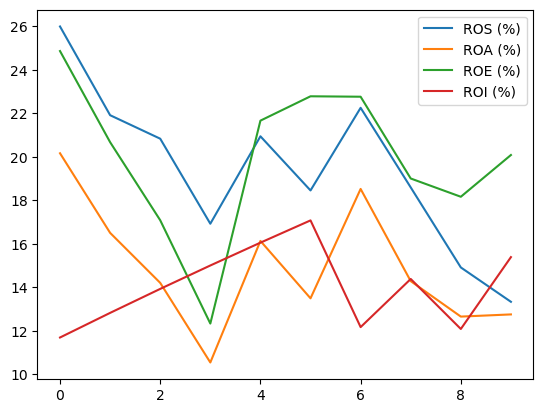

In [ ]:
df.drop(columns='Year').plot()